In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
df = pd.read_csv("14-income_evaluation.csv")

In [244]:
df.head()

age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country  income  
0           2174              0               40   United-States   <=50K  
1              0              0               13   United-States   <=50K  
2              0              0               40   United-States   <=50K  
3              0              0               40   United-States   <=50K  
4              0              0               40            Cuba   <=50K

In [245]:
df.shape

(32561, 15)

In [246]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [247]:
col_names = ["age","workclass","finalweight","education","education_num","marital_status","occupation","relationship","race",
             "sex","capital_gain","capital_loss","hours_per_week","native_country","income"]

In [248]:
df.columns = col_names

In [249]:
df.columns

Index(['age', 'workclass', 'finalweight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   finalweight     32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [251]:
df.describe()

age   finalweight  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [252]:
 df.isnull().sum()

age               0
workclass         0
finalweight       0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [253]:
categorical = [col for col in df.columns if df[col].dtype =="O"] #data tipi object olanlar 
numerical = [col for col in df.columns if df[col].dtype !="O"]

In [254]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [255]:
numerical

['age',
 'finalweight',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [256]:
df[categorical].head() #sadece kategorikler 

workclass   education       marital_status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native_country  income  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

In [257]:
for col in categorical:
    print(df[col].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [258]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

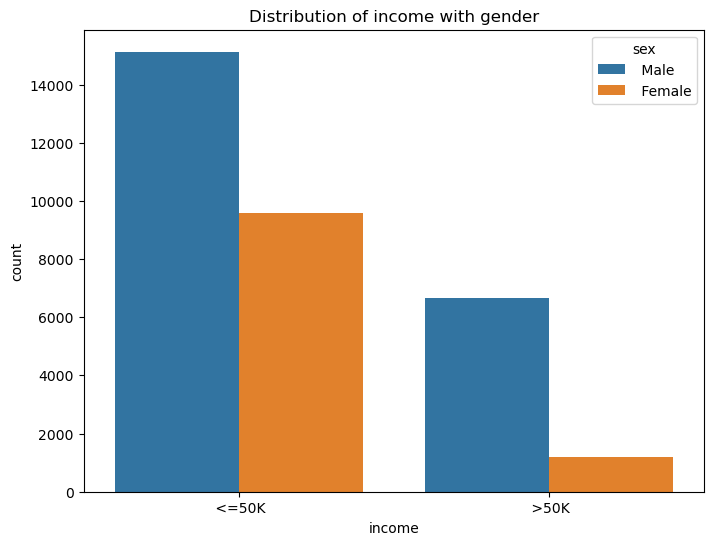

In [259]:
fig,ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x="income",hue="sex",data=df)
ax.set_title("Distribution of income with gender")
plt.show()

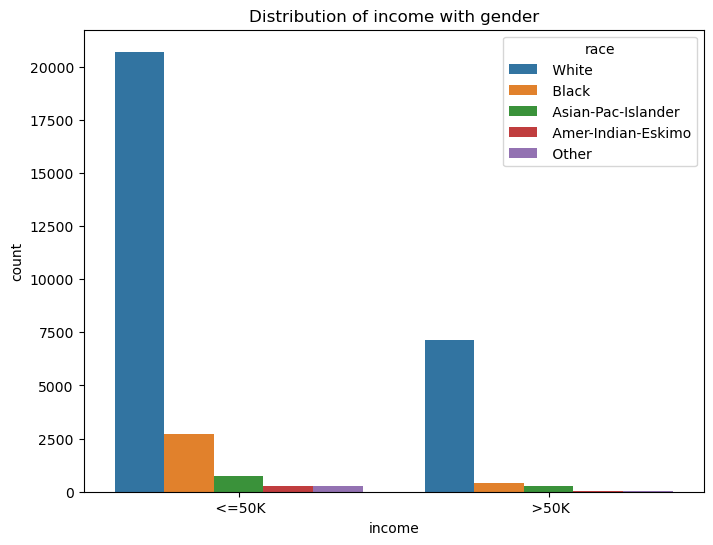

In [260]:
fig,ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x="income",hue="race",data=df)
ax.set_title("Distribution of income with gender")
plt.show()

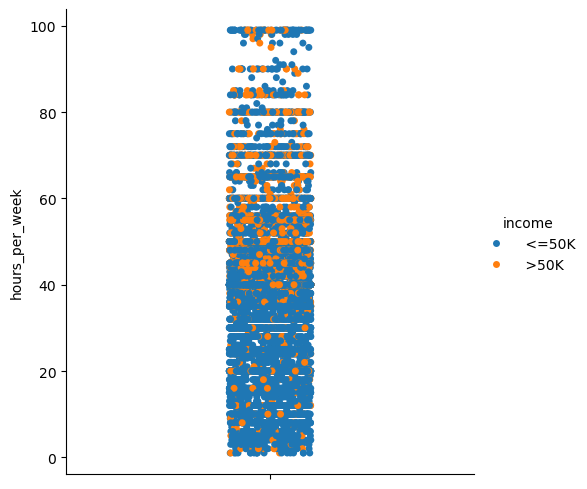

In [261]:
sns.catplot(y=df["hours_per_week"],hue = df["income"])
plt.show()

In [262]:
df[df["hours_per_week"]>40]
#40 satten fazla olanları getirdik

age          workclass  finalweight      education  education_num  \
7       52   Self-emp-not-inc       209642        HS-grad              9   
8       31            Private        45781        Masters             14   
10      37            Private       280464   Some-college             10   
13      32            Private       205019     Assoc-acdm             12   
15      34            Private       245487        7th-8th              4   
...    ...                ...          ...            ...            ...   
32538   38            Private       139180      Bachelors             13   
32543   45          Local-gov       119199     Assoc-acdm             12   
32548   65   Self-emp-not-inc        99359    Prof-school             15   
32550   43   Self-emp-not-inc        27242   Some-college             10   
32552   43            Private        84661      Assoc-voc             11   

            marital_status         occupation    relationship  \
7       Married-civ-spouse    Exec-managerial         Husband   
8            Never-married     Prof-specialty   Not-in-family   
10      Married-civ-spouse    Exec-managerial         Husband   
13           Never-married              Sales   Not-in-family   
15      Married-civ-spouse   Transport-moving         Husband   
...                    ...                ...             ...   
32538             Divorced     Prof-specialty       Unmarried   
32543             Divorced     Prof-specialty       Unmarried   
32548        Never-married     Prof-specialty   Not-in-family   
32550   Married-civ-spouse       Craft-repair         Husband   
32552   Married-civ-spouse              Sales         Husband   

                      race      sex  capital_gain  capital_loss  \
7                    White     Male             0             0   
8                    White   Female         14084             0   
10                   Black     Male             0             0   
13                   Black     Male             0             0   
15      Amer-Indian-Eskimo     Male             0             0   
...                    ...      ...           ...           ...   
32538                Black   Female         15020             0   
32543                White   Female             0             0   
32548                White     Male          1086             0   
32550                White     Male             0             0   
32552                White     Male             0             0   

       hours_per_week  native_country  income  
7                  45   United-States    >50K  
8                  50   United-States    >50K  
10                 80   United-States    >50K  
13                 50   United-States   <=50K  
15                 45          Mexico   <=50K  
...               ...             ...     ...  
32538              45   United-States    >50K  
32543              48   United-States   <=50K  
32548              60   United-States   <=50K  
32550              50   United-States   <=50K  
32552              45   United-States   <=50K  

[9581 rows x 15 columns]

In [263]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [264]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [265]:
df["workclass"] = df["workclass"].replace(" ?",np.nan)

In [266]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [267]:
df["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [268]:
df["marital_status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [269]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [270]:
df["occupation"] = df["occupation"].replace(" ?",np.nan)

In [271]:
df["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [272]:
df["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [273]:
df["native_country"] = df["native_country"].replace(" ?",np.nan)

In [274]:
df.isnull().sum()

age                  0
workclass         1836
finalweight          0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

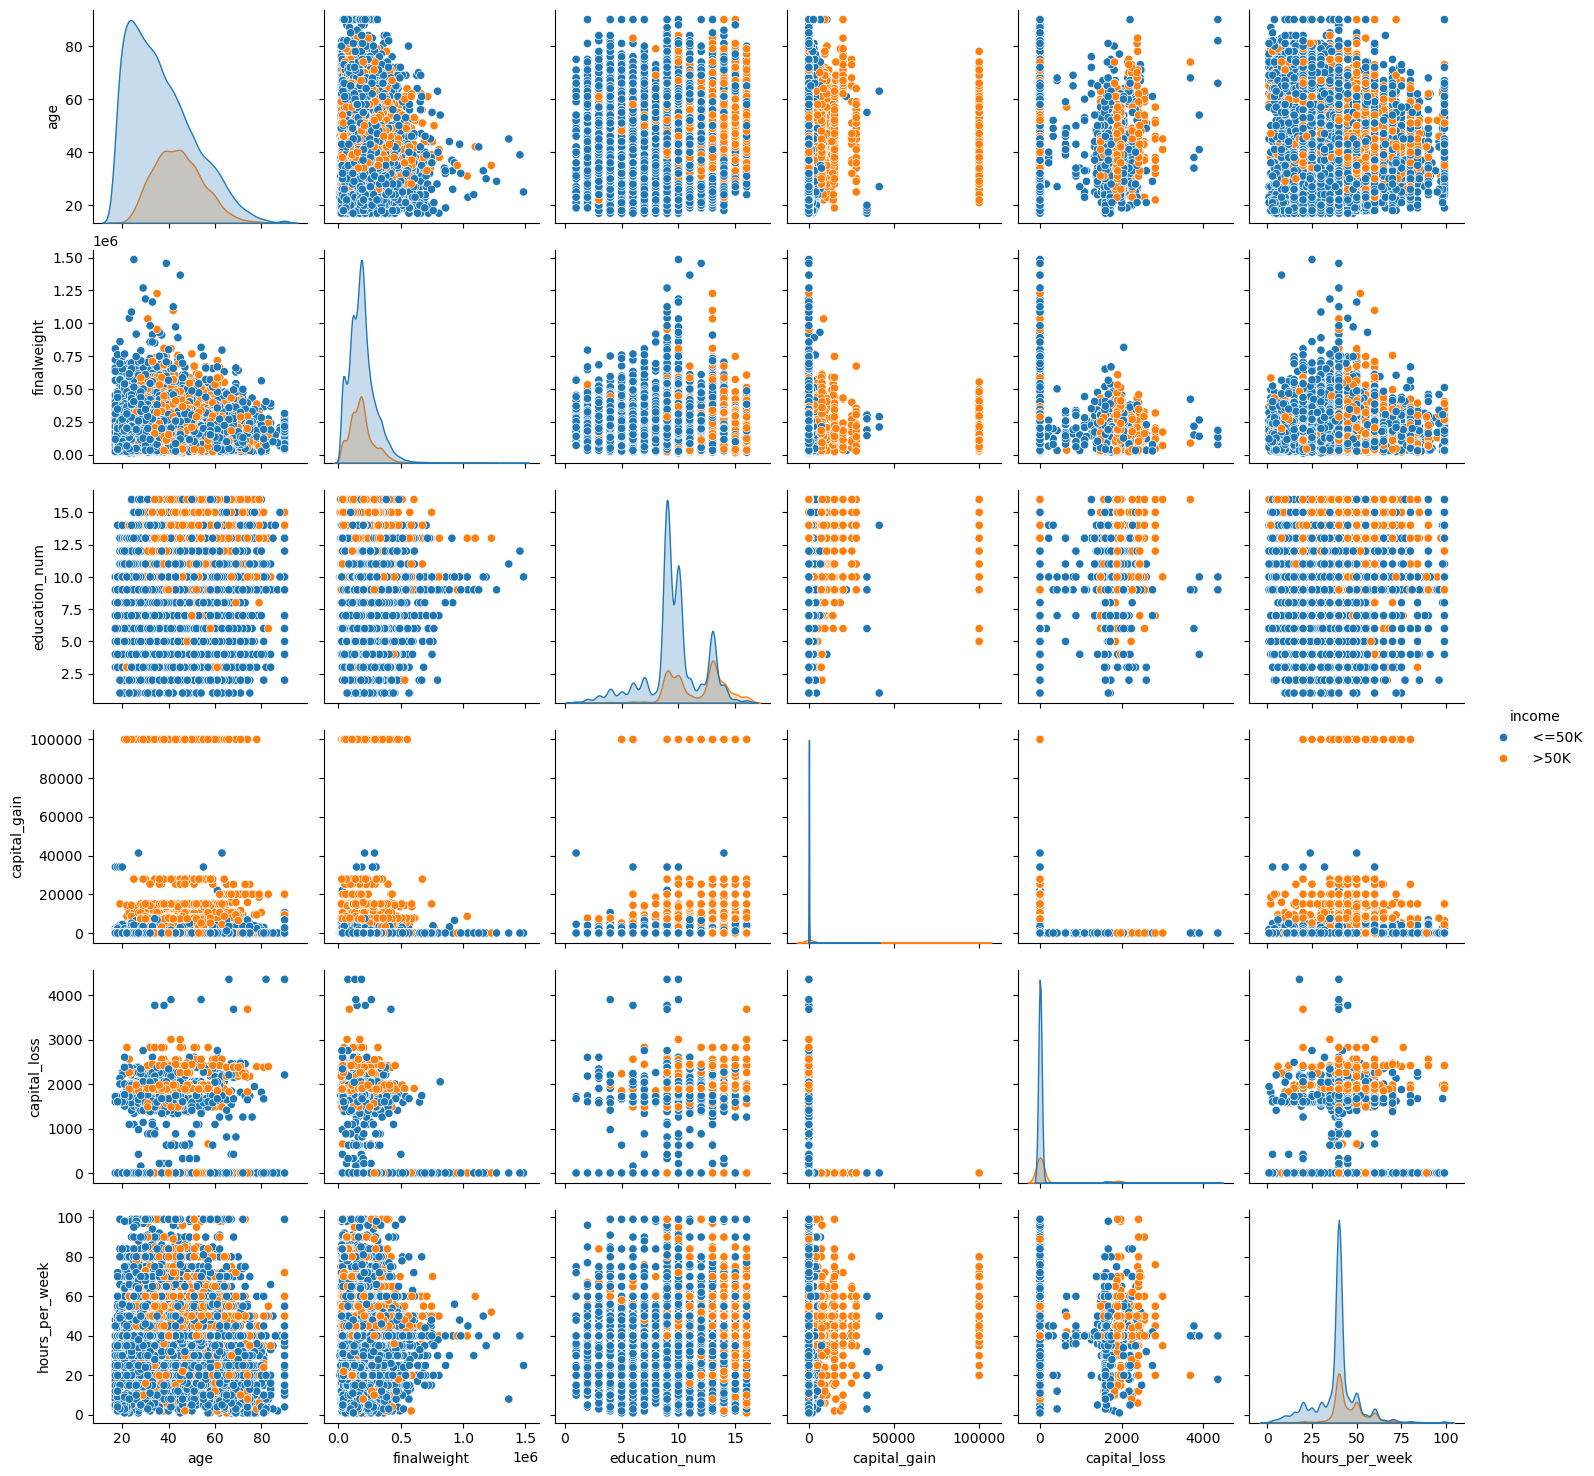

In [275]:
sns.pairplot(df,hue="income")
plt.show()

In [276]:
X=df.drop('income',axis=1)
y=df['income']

In [277]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [278]:
categorical = [col for col in X_train.columns if X_train[col].dtype =="O"]

In [279]:
X_train[categorical].isnull().sum()

workclass         1447
education            0
marital_status       0
occupation        1454
relationship         0
race                 0
sex                  0
native_country     458
dtype: int64

In [280]:
X_test[categorical].isnull().sum()

workclass         389
education           0
marital_status      0
occupation        389
relationship        0
race                0
sex                 0
native_country    125
dtype: int64

In [281]:
X_train['workclass'].mode()[0]

' Private'

In [282]:
for i in [X_train, X_test]:
    i['workclass'] = i['workclass'].fillna(X_train['workclass'].mode()[0])
    i['occupation'] = i['occupation'].fillna(X_train['occupation'].mode()[0])
    i['native_country'] = i['native_country'].fillna(X_train['native_country'].mode()[0])

In [283]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [284]:
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [285]:
#encoding

In [286]:
X_train[categorical].head()

workclass      education       marital_status  \
5514           Local-gov      Bachelors        Never-married   
19777            Private      Assoc-voc   Married-civ-spouse   
10781   Self-emp-not-inc            9th            Separated   
32240            Private      Assoc-voc   Married-civ-spouse   
9876             Private   Some-college             Divorced   

             occupation    relationship    race      sex  native_country  
5514     Prof-specialty   Not-in-family   White   Female   United-States  
19777   Exec-managerial         Husband   White     Male   United-States  
10781      Craft-repair   Not-in-family   White     Male   United-States  
32240   Farming-fishing         Husband   White     Male   United-States  
9876      Other-service   Not-in-family   White     Male   United-States

In [287]:
df[categorical].nunique()
#kaç adet benzersiz değer var bakalım

workclass          8
education         16
marital_status     7
occupation        14
relationship       6
race               5
sex                2
native_country    41
dtype: int64

In [288]:
y_train_binary = y_train.apply(lambda x:1 if x.strip() =='>50K' else 0)

In [289]:
target_means = y_train_binary.groupby(X_train['native_country']).mean()

In [290]:
target_means

native_country
Cambodia                      0.375000
Canada                        0.313131
China                         0.210526
Columbia                      0.037736
Cuba                          0.263158
Dominican-Republic            0.032258
Ecuador                       0.086957
El-Salvador                   0.093023
England                       0.342105
France                        0.500000
Germany                       0.295238
Greece                        0.272727
Guatemala                     0.058824
Haiti                         0.105263
Holand-Netherlands            0.000000
Honduras                      0.000000
Hong                          0.416667
Hungary                       0.100000
India                         0.405063
Iran                          0.419355
Ireland                       0.210526
Italy                         0.355932
Jamaica                       0.147059
Japan                         0.392157
Laos                          0.071429
Mexico    

In [291]:
#Train set için Hedef Kodlama ülke adlarını, geliri >50K olanların oranı ile eşleştirir.
X_train['native_country_encoded']=X_train['native_country'].map(target_means) 

#Kodlama sonrası ortaya çıkan bilinmeyen NaN değerleri, tüm eğitim setinin genel ortalaması ile doldur.
X_train['native_country_encoded']=X_train['native_country_encoded'].fillna(y_train_binary.mean())

# est setine aynı kodlama kuralını uygula Veri Sızıntısını önler.
X_test['native_country_encoded'] = X_test['native_country'].map(target_means)

#Test setinde, eğitimde görülmeyen kategorileri genel ortalama ile doldur. 
X_test['native_country_encoded']=X_test['native_country_encoded'].fillna(y_train_binary.mean())

In [292]:
X_train.head()

age          workclass  finalweight      education  education_num  \
5514    33          Local-gov       198183      Bachelors             13   
19777   36            Private        86459      Assoc-voc             11   
10781   58   Self-emp-not-inc       203039            9th              5   
32240   21            Private       180190      Assoc-voc             11   
9876    27            Private       279872   Some-college             10   

            marital_status        occupation    relationship    race      sex  \
5514         Never-married    Prof-specialty   Not-in-family   White   Female   
19777   Married-civ-spouse   Exec-managerial         Husband   White     Male   
10781            Separated      Craft-repair   Not-in-family   White     Male   
32240   Married-civ-spouse   Farming-fishing         Husband   White     Male   
9876              Divorced     Other-service   Not-in-family   White     Male   

       capital_gain  capital_loss  hours_per_week  native_country  \
5514              0             0              50   United-States   
19777             0          1887              50   United-States   
10781             0             0              40   United-States   
32240             0             0              46   United-States   
9876              0             0              40   United-States   

       native_country_encoded  
5514                 0.246275  
19777                0.246275  
10781                0.246275  
32240                0.246275  
9876                 0.246275

In [293]:
X_train = X_train.drop("native_country",axis=1)
X_test=X_test.drop("native_country",axis=1)

In [294]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [295]:
one_hot_categories = ['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [296]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [297]:
encoder = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(handle_unknown="ignore",sparse_output=False),one_hot_categories)
         ],remainder="passthrough"
        )

In [298]:
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

In [299]:
X_train_enc

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.00000000e+01, 2.46274939e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.88700000e+03, 5.00000000e+01, 2.46274939e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.00000000e+01, 2.46274939e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.00000000e+01, 2.46274939e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.40000000e+01, 2.46274939e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.00000000e+01, 2.46274939e-01]])

In [300]:
columns = encoder.get_feature_names_out()
#Kodlayıcı ColumnTransformer sonrası oluşan yeni sütun adlarını listeler.

In [301]:
columns

array(['cat__workclass_ Federal-gov', 'cat__workclass_ Local-gov',
       'cat__workclass_ Never-worked', 'cat__workclass_ Private',
       'cat__workclass_ Self-emp-inc', 'cat__workclass_ Self-emp-not-inc',
       'cat__workclass_ State-gov', 'cat__workclass_ Without-pay',
       'cat__education_ 10th', 'cat__education_ 11th',
       'cat__education_ 12th', 'cat__education_ 1st-4th',
       'cat__education_ 5th-6th', 'cat__education_ 7th-8th',
       'cat__education_ 9th', 'cat__education_ Assoc-acdm',
       'cat__education_ Assoc-voc', 'cat__education_ Bachelors',
       'cat__education_ Doctorate', 'cat__education_ HS-grad',
       'cat__education_ Masters', 'cat__education_ Preschool',
       'cat__education_ Prof-school', 'cat__education_ Some-college',
       'cat__marital_status_ Divorced',
       'cat__marital_status_ Married-AF-spouse',
       'cat__marital_status_ Married-civ-spouse',
       'cat__marital_status_ Married-spouse-absent',
       'cat__marital_status_ Never-mar

In [302]:
X_train = pd.DataFrame(X_train_enc,columns = columns,index = X_train.index)
X_test = pd.DataFrame(X_test_enc,columns=columns,index=X_test.index)

In [303]:
X_train

cat__workclass_ Federal-gov  cat__workclass_ Local-gov  \
5514                           0.0                        1.0   
19777                          0.0                        0.0   
10781                          0.0                        0.0   
32240                          0.0                        0.0   
9876                           0.0                        0.0   
...                            ...                        ...   
29802                          0.0                        0.0   
5390                           0.0                        0.0   
860                            0.0                        0.0   
15795                          0.0                        0.0   
23654                          0.0                        0.0   

       cat__workclass_ Never-worked  cat__workclass_ Private  \
5514                            0.0                      0.0   
19777                           0.0                      1.0   
10781                           0.0                      0.0   
32240                           0.0                      1.0   
9876                            0.0                      1.0   
...                             ...                      ...   
29802                           0.0                      1.0   
5390                            0.0                      1.0   
860                             0.0                      1.0   
15795                           0.0                      0.0   
23654                           0.0                      0.0   

       cat__workclass_ Self-emp-inc  cat__workclass_ Self-emp-not-inc  \
5514                            0.0                               0.0   
19777                           0.0                               0.0   
10781                           0.0                               1.0   
32240                           0.0                               0.0   
9876                            0.0                               0.0   
...                             ...                               ...   
29802                           0.0                               0.0   
5390                            0.0                               0.0   
860                             0.0                               0.0   
15795                           0.0                               1.0   
23654                           1.0                               0.0   

       cat__workclass_ State-gov  cat__workclass_ Without-pay  \
5514                         0.0                          0.0   
19777                        0.0                          0.0   
10781                        0.0                          0.0   
32240                        0.0                          0.0   
9876                         0.0                          0.0   
...                          ...                          ...   
29802                        0.0                          0.0   
5390                         0.0                          0.0   
860                          0.0                          0.0   
15795                        0.0                          0.0   
23654                        0.0                          0.0   

       cat__education_ 10th  cat__education_ 11th  ...  cat__race_ White  \
5514                    0.0                   0.0  ...               1.0   
19777                   0.0                   0.0  ...               1.0   
10781                   0.0                   0.0  ...               1.0   
32240                   0.0                   0.0  ...               1.0   
9876                    0.0                   0.0  ...               1.0   
...                     ...                   ...  ...               ...   
29802                   0.0                   0.0  ...               1.0   
5390                    0.0                   0.0  ...               1.0   
860                     0.0                   1.0  ...               1.0   
15795                   0.0            

In [304]:
X_test

cat__workclass_ Federal-gov  cat__workclass_ Local-gov  \
14160                          0.0                        0.0   
27048                          0.0                        0.0   
28868                          0.0                        0.0   
5667                           0.0                        0.0   
7827                           0.0                        0.0   
...                            ...                        ...   
1338                           0.0                        0.0   
24534                          0.0                        1.0   
18080                          0.0                        0.0   
10354                          0.0                        0.0   
24639                          0.0                        0.0   

       cat__workclass_ Never-worked  cat__workclass_ Private  \
14160                           0.0                      1.0   
27048                           0.0                      0.0   
28868                           0.0                      1.0   
5667                            0.0                      1.0   
7827                            0.0                      0.0   
...                             ...                      ...   
1338                            0.0                      1.0   
24534                           0.0                      0.0   
18080                           0.0                      1.0   
10354                           0.0                      1.0   
24639                           0.0                      1.0   

       cat__workclass_ Self-emp-inc  cat__workclass_ Self-emp-not-inc  \
14160                           0.0                               0.0   
27048                           0.0                               0.0   
28868                           0.0                               0.0   
5667                            0.0                               0.0   
7827                            0.0                               1.0   
...                             ...                               ...   
1338                            0.0                               0.0   
24534                           0.0                               0.0   
18080                           0.0                               0.0   
10354                           0.0                               0.0   
24639                           0.0                               0.0   

       cat__workclass_ State-gov  cat__workclass_ Without-pay  \
14160                        0.0                          0.0   
27048                        1.0                          0.0   
28868                        0.0                          0.0   
5667                         0.0                          0.0   
7827                         0.0                          0.0   
...                          ...                          ...   
1338                         0.0                          0.0   
24534                        0.0                          0.0   
18080                        0.0                          0.0   
10354                        0.0                          0.0   
24639                        0.0                          0.0   

       cat__education_ 10th  cat__education_ 11th  ...  cat__race_ White  \
14160                   0.0                   0.0  ...               1.0   
27048                   0.0                   0.0  ...               1.0   
28868                   0.0                   0.0  ...               0.0   
5667                    0.0                   0.0  ...               1.0   
7827                    0.0                   0.0  ...               1.0   
...                     ...                   ...  ...               ...   
1338                    0.0                   0.0  ...               1.0   
24534                   0.0                   0.0  ...               1.0   
18080                   0.0                   0.0  ...               1.0   
10354                   0.0            

In [305]:
cols = X_train.columns

In [306]:
#scaler yapmayabiliriz ama yine de deneyelim 

In [307]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [308]:
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [309]:
X_train = pd.DataFrame(X_train,columns=cols)

In [310]:
X_train

cat__workclass_ Federal-gov  cat__workclass_ Local-gov  \
0                              0.0                        1.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              0.0                        0.0   
4                              0.0                        0.0   
...                            ...                        ...   
26043                          0.0                        0.0   
26044                          0.0                        0.0   
26045                          0.0                        0.0   
26046                          0.0                        0.0   
26047                          0.0                        0.0   

       cat__workclass_ Never-worked  cat__workclass_ Private  \
0                               0.0                     -1.0   
1                               0.0                      0.0   
2                               0.0                     -1.0   
3                               0.0                      0.0   
4                               0.0                      0.0   
...                             ...                      ...   
26043                           0.0                      0.0   
26044                           0.0                      0.0   
26045                           0.0                      0.0   
26046                           0.0                     -1.0   
26047                           0.0                     -1.0   

       cat__workclass_ Self-emp-inc  cat__workclass_ Self-emp-not-inc  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               1.0   
3                               0.0                               0.0   
4                               0.0                               0.0   
...                             ...                               ...   
26043                           0.0                               0.0   
26044                           0.0                               0.0   
26045                           0.0                               0.0   
26046                           0.0                               1.0   
26047                           1.0                               0.0   

       cat__workclass_ State-gov  cat__workclass_ Without-pay  \
0                            0.0                          0.0   
1                            0.0                          0.0   
2                            0.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          0.0   
...                          ...                          ...   
26043                        0.0                          0.0   
26044                        0.0                          0.0   
26045                        0.0                          0.0   
26046                        0.0                          0.0   
26047                        0.0                          0.0   

       cat__education_ 10th  cat__education_ 11th  ...  cat__race_ White  \
0                       0.0                   0.0  ...               0.0   
1                       0.0                   0.0  ...               0.0   
2                       0.0                   0.0  ...               0.0   
3                       0.0                   0.0  ...               0.0   
4                       0.0                   0.0  ...               0.0   
...                     ...                   ...  ...               ...   
26043                   0.0                   0.0  ...               0.0   
26044                   0.0                   0.0  ...               0.0   
26045                   0.0                   1.0  ...               0.0   
26046                   0.0            

In [311]:
X_test = pd.DataFrame(X_test,columns=cols)

In [312]:
#training

In [313]:
from sklearn.ensemble import RandomForestClassifier

In [314]:
rfc = RandomForestClassifier(n_estimators=10,random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [315]:
y_pred = rfc.predict(X_test)

In [316]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [317]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8487640104406572
[[4602  340]
 [ 645  926]]
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4942
        >50K       0.73      0.59      0.65      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [318]:
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8588975894365116
[[4604  338]
 [ 581  990]]
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4942
        >50K       0.75      0.63      0.68      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.85      0.86      0.85      6513



In [319]:
rfc.feature_importances_
#Rastgele Orman modelinin, tahmin yaparken her bir özelliğin sütunun göreceli önemini gösteren dizi. 
#Yüksek değerler o özelliğin model için daha kritik olduğunu belirtir.

array([5.59890899e-03, 6.00545712e-03, 2.11712168e-07, 1.09361036e-02,
       5.81906524e-03, 8.99573149e-03, 4.49913823e-03, 7.75424153e-05,
       1.11606542e-03, 1.54020560e-03, 8.35454507e-04, 2.62356004e-04,
       6.98561005e-04, 1.75463386e-03, 9.65405272e-04, 2.39256160e-03,
       2.92646008e-03, 1.19128119e-02, 3.30266756e-03, 7.51654964e-03,
       7.82049670e-03, 4.37347573e-05, 4.98022764e-03, 5.32932890e-03,
       5.80133078e-03, 2.84038446e-04, 7.51054002e-02, 8.47680572e-04,
       2.20698549e-02, 1.56416972e-03, 1.43924649e-03, 5.80349261e-03,
       1.88493088e-06, 7.16547638e-03, 1.75708468e-02, 4.58204787e-03,
       3.11517492e-03, 4.23925230e-03, 6.13318850e-03, 9.29424623e-05,
       9.74765050e-03, 3.04330386e-03, 7.72553474e-03, 5.05702241e-03,
       4.96058359e-03, 4.02296198e-02, 1.13864967e-02, 1.28869717e-03,
       8.00284816e-03, 5.49995157e-03, 9.40242393e-03, 1.21574487e-03,
       3.45385885e-03, 5.17980718e-03, 8.46329759e-04, 7.10506032e-03,
      

In [320]:
feature_scores = pd.Series(rfc.feature_importances_,index = X_train.columns).sort_values(ascending=False)

In [331]:
feature_scores.tail(10)

cat__race_ Other                          8.463298e-04
cat__education_ 12th                      8.354545e-04
cat__education_ 5th-6th                   6.985610e-04
cat__marital_status_ Married-AF-spouse    2.840384e-04
cat__education_ 1st-4th                   2.623560e-04
cat__occupation_ Priv-house-serv          9.294246e-05
cat__workclass_ Without-pay               7.754242e-05
cat__education_ Preschool                 4.373476e-05
cat__occupation_ Armed-Forces             1.884931e-06
cat__workclass_ Never-worked              2.117122e-07
dtype: float64

In [334]:
X_train = X_train.drop(["cat__workclass_ Never-worked", "cat__occupation_ Armed-Forces","cat__education_ Preschool",
                       "cat__workclass_ Without-pay", "cat__occupation_ Priv-house-serv", "cat__marital_status_ Married-AF-spouse",
                        "cat__education_ 1st-4th", "cat__education_ 5th-6th", "cat__race_ Other", "cat__education_ 12th"
                       ], axis=1)

KeyError: "['cat__workclass_ Never-worked', 'cat__occupation_ Armed-Forces', 'cat__education_ Preschool', 'cat__workclass_ Without-pay', 'cat__occupation_ Priv-house-serv', 'cat__marital_status_ Married-AF-spouse', 'cat__education_ 1st-4th', 'cat__education_ 5th-6th', 'cat__race_ Other', 'cat__education_ 12th'] not found in axis"

In [333]:
X_test = X_test.drop(["cat__workclass_ Never-worked", "cat__occupation_ Armed-Forces","cat__education_ Preschool",
                       "cat__workclass_ Without-pay", "cat__occupation_ Priv-house-serv", "cat__marital_status_ Married-AF-spouse",
                        "cat__education_ 1st-4th", "cat__education_ 5th-6th", "cat__race_ Other", "cat__education_ 12th"
                       ], axis=1)

In [335]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[4604  338]
 [ 581  990]]


In [336]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4942
        >50K       0.75      0.63      0.68      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.85      0.86      0.85      6513



In [337]:
## Hyperparameter Tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [338]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=rfc, param_distributions=rf_params,n_iter=10,cv=3,verbose=2,n_jobs=-1)
rscv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
y_pred = rscv.predict(X_test)
print(f'Model accuracy score with default decision-trees : {accuracy_score(y_test, y_pred)}')

In [ ]:
rscv.best_params_

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))